In [1]:
import pandas as pd
import random

data = []

for i in range(500):
    cgpa = round(random.uniform(5, 10), 2)
    coding = random.randint(1, 5)
    ml = random.randint(1, 5)
    math = random.randint(1, 5)
    comm = random.randint(1, 5)
    projects = random.randint(0, 5)

    interest_ai = random.randint(1, 5)
    interest_web = random.randint(1, 5)
    interest_core = random.randint(1, 5)
    research_interest = random.randint(1, 5)
    management_interest = random.randint(1, 5)
    higher_ed_interest = random.randint(1, 5)

    # Step 1: Decide Path
    if higher_ed_interest >= 4:
        career_path = "Higher Education"

        # Step 2: Higher Education Recommendation
        if research_interest >= 4 and math >= 4:
            final_rec = "PhD / Research"
        elif management_interest >= 4 and comm >= 4:
            final_rec = "MBA"
        elif ml >= 4 and interest_ai >= 4:
            final_rec = "MS in AI / Data Science"
        else:
            final_rec = "MTech"

    else:
        career_path = "Job"

        # Job Recommendation
        if interest_ai >= 4 and ml >= 4 and math >= 4:
            final_rec = "Data Scientist"
        elif interest_ai >= 4 and coding >= 4:
            final_rec = "AI Engineer"
        elif interest_web >= 4 and coding >= 4:
            final_rec = "Web Developer"
        elif comm >= 4 and coding <= 2:
            final_rec = "Management Role"
        else:
            final_rec = "Software Engineer"

    data.append([
        cgpa, coding, ml, math, comm, projects,
        interest_ai, interest_web, interest_core,
        research_interest, management_interest,
        higher_ed_interest, career_path, final_rec
    ])

columns = [
    "CGPA", "Coding_Level", "ML_Knowledge", "Math_Score",
    "Communication", "Projects",
    "Interest_AI", "Interest_Web", "Interest_Core",
    "Research_Interest", "Management_Interest",
    "Higher_Ed_Interest", "Career_Path", "Final_Recommendation"
]

df = pd.DataFrame(data, columns=columns)
df.to_csv("student_career_dataset_v2.csv", index=False)

print("Enhanced dataset created successfully!")
df.head()


Enhanced dataset created successfully!


,CGPA,Coding_Level,ML_Knowledge,Math_Score,Communication,Projects,Interest_AI,Interest_Web,Interest_Core,Research_Interest,Management_Interest,Higher_Ed_Interest,Career_Path,Final_Recommendation
0,5.77,3,2,5,2,2,2,4,1,1,3,3,Job,Software Engineer
1,8.75,5,1,3,1,4,2,2,4,5,4,2,Job,Software Engineer
2,6.91,5,2,1,5,1,2,5,1,5,1,3,Job,Web Developer
3,5.27,1,1,1,5,0,4,1,3,3,5,5,Higher Education,MBA
4,6.61,4,2,4,5,1,2,5,2,1,5,5,Higher Education,MBA


In [2]:
import pandas as pd
df = pd.read_csv("student_career_dataset_v2.csv")
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum())

(500, 14)
Index(['CGPA', 'Coding_Level', 'ML_Knowledge', 'Math_Score', 'Communication',
       'Projects', 'Interest_AI', 'Interest_Web', 'Interest_Core',
       'Research_Interest', 'Management_Interest', 'Higher_Ed_Interest',
       'Career_Path', 'Final_Recommendation'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CGPA                  500 non-null    float64
 1   Coding_Level          500 non-null    int64  
 2   ML_Knowledge          500 non-null    int64  
 3   Math_Score            500 non-null    int64  
 4   Communication         500 non-null    int64  
 5   Projects              500 non-null    int64  
 6   Interest_AI           500 non-null    int64  
 7   Interest_Web          500 non-null    int64  
 8   Interest_Core         500 non-null    int64  
 9   Research_Interest     500 non-nu

In [3]:
# checking target distribution
print(df['Final_Recommendation'].value_counts())
print(df["Career_Path"].value_counts())

Final_Recommendation
Software Engineer          169
MTech                      114
Management Role             47
PhD / Research              46
AI Engineer                 34
MBA                         32
Web Developer               26
Data Scientist              16
MS in AI / Data Science     16
Name: count, dtype: int64
Career_Path
Job                 292
Higher Education    208
Name: count, dtype: int64


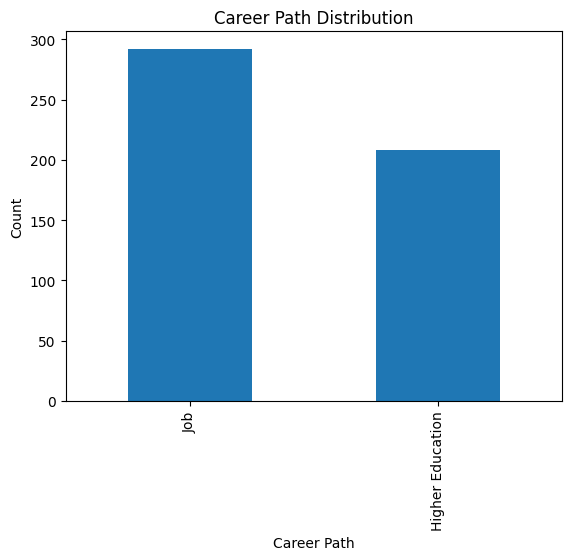

In [4]:
import matplotlib.pyplot as plt
df["Career_Path"].value_counts().plot(kind="bar")
plt.title("Career Path Distribution")
plt.xlabel("Career Path")
plt.ylabel("Count")
plt.show()

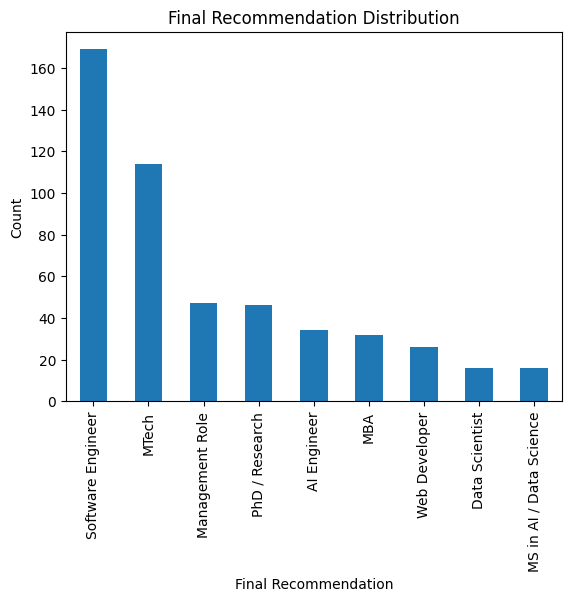

In [5]:
df["Final_Recommendation"].value_counts().plot(kind="bar")
plt.title("Final Recommendation Distribution")
plt.xlabel("Final Recommendation")
plt.ylabel("Count")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Career_Path"] = le.fit_transform(df["Career_Path"])

In [7]:
#PREPARING DATA MODEL 1
# load the dataset
df = pd.read_csv("student_career_dataset_v2.csv")

In [8]:
# separate the features and target
X = df.drop(["Final_Recommendation", "Career_Path"], axis=1)
y = df["Career_Path"]

In [9]:
# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [10]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# train model 1 (decision tree)
from sklearn.tree import DecisionTreeClassifier
model_path= DecisionTreeClassifier(random_state=42)
model_path.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [11]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model_path.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        58

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [12]:
#preparing data for model 2
X2=df.drop("Final_Recommendation",axis=1)
y2=df["Final_Recommendation"]

from sklearn.preprocessing import LabelEncoder
# Encode 'Career_Path' in X2, as it was reloaded as a string column
le_career_path_X2 = LabelEncoder()
X2['Career_Path'] = le_career_path_X2.fit_transform(X2['Career_Path'])

le_rec = LabelEncoder()
y2 = le_rec.fit_transform(y2)

In [13]:
#train-test model 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,  y2,test_size=0.2 ,random_state=42)

In [14]:
model_rec= DecisionTreeClassifier(random_state=42)
model_rec.fit(X2_train, y2_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [15]:
y2_pred = model_rec.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test,y2_pred))
print(classification_report(y2_test, y2_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         6
           3       0.40      0.67      0.50         3
           4       0.95      0.87      0.91        23
           5       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        10
           7       0.97      1.00      0.98        29
           8       1.00      1.00      1.00         7

    accuracy                           0.94       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.95      0.94      0.94       100



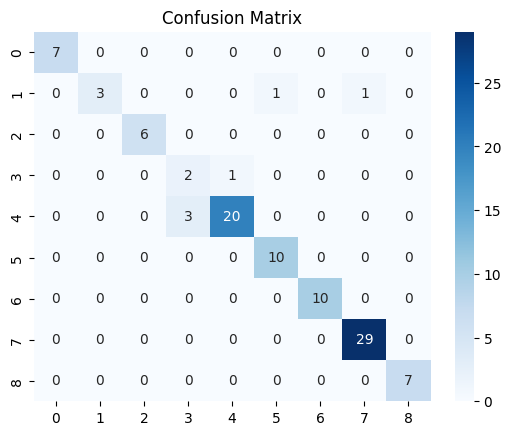

In [16]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y2_test, y2_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [17]:
import joblib

joblib.dump(model_path, "career_path_model.pkl")
joblib.dump(model_rec, "final_recommendation_model.pkl")
joblib.dump(le, "career_path_encoder.pkl")
joblib.dump(le_rec, "final_recommendation_encoder.pkl")

print("Models saved successfully!")


Models saved successfully!
